<a href="https://colab.research.google.com/github/ahmedthami/Ai/blob/main/DigitRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import utils as np_utils
from keras import backend as k
from tensorflow.keras.optimizers import SGD

#plt

from matplotlib import pyplot as plt


In [ ]:
#mnist_load_data()
#load the image and all have single color channel (gray)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# for i in range(9):
#   #define subplot
#   plt.subplot(330 + 1 + i)
#   plt.imshow(x_train[i] , cmap=plt.get_cmap('gray'))



x_train = x_train.reshape(x_train.shape[0], 28 ,28,1 )
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)


#train data class matrix ==> to binary matirx 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#defin it as a function

def load_dataset():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  y_train , y_test = to_categorical(y_train), to_categorical(y_test)
  return x_train , y_train, x_test, y_train
  

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
#normalize the pixels 
def norm_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm /= 255.0
  test_norm /= 255.0
  return train_norm, test_norm

print("Done")

Done


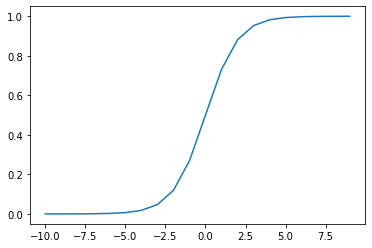

In [ ]:
# Relu activation function
import math
def func(x):
  return 1.0 / (1.0 + math.exp(-x))
def relu():
  input = [x for x in range(-10, 10)]
  plt.plot(input, [func(x) for x in input])
  plt.show()

relu()




In [ ]:



def MyModel():
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size= (3,3), activation= "relu", kernel_initializer= "he_uniform", input_shape=(28,28,1) ))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation= "relu", kernel_initializer= "he_uniform"))
  model.add(Dense(10, activation= "softmax"))
  #Compile model

  opt = SGD(learning_rate= 0.001 , momentum = 0.9)

  model.compile(optimizer = opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model





In [ ]:
#k-fold validation to determine accuracy
from sklearn.model_selection import KFold  

def k_fold_validation(dataX, dataY, folds= 5):
  histories , accuracies = list(), list()
  #history to conserve the set trained
  #accuracy to conserve its output 
  kfold = KFold(folds, shuffle = True)
  for xtr, xtes in kfold.split(dataX):
    model = MyModel()
    #select the training and testing data 
    Xtrain, Ytrain , Xtest, Ytest = dataX[xtr] , dataY[xtr], dataX[xtes], dataY[xtes]
    history = model.fit(Xtrain, Ytrain, batch_size= 32, epochs= 10, validation_data= (Xtest, Ytest), verbose = 0)
    _ , acc = model.evaluate(Xtest, Ytest, verbose= 0)
    print('> %.3f' % (acc * 100.0))
    accuracies.append(acc)
    histories.append(history)

  return histories, accuracies


In [ ]:
def diagnostic_sum(histories):
  for his in range(len(histories)):
    plt.subplot(2,1,2)
    plt.plot(histories[his].history['loss'], color= "blue", label="train")
    plt.plot(histories[his].history['val_loss'], color= "orange ", label= "test")
    plt.subplot(2,1,2)
    plt.plot(histories[his].history['acc'], color= "blue", label = "train")
    plt.plot(histories[his].history['val_acc'], color = "orange", label = "test")

  plt.show()


# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()



In [ ]:
def run_test_harness():
  x_train, y_train, x_test, y_test= load_dataset()
  trainX , testX = norm_pixels(x_train, x_test)
  # histories , accuracies = k_fold_validation(trainX, y_train)
  # diagnostic_sum(histories)
  # summarize_performance(accuracies)
  model = MyModel()
  model.fit(trainX, y_train, batch_size= 32, epochs= 6, verbose=0)
  model.save("final_model.h5")
run_test_harness()
from keras.preprocessing import image

def imgload(filename):
  #load image
  img = image.load_img(filename, grayscale = True, target_size = (28,28))
  #image to numerical
  img = image.img_to_array(img)
  #reshape
  img = img.reshape(1,28,28)
  #pixel and between 0 and 1
  img = img.astype("float32")
  img /= 255.0
  return img

# from keras import models
# import numpy as np
# model = models.load_model('/content/final_model.h5')
# import numpy as np
# my_image = imgload('/content/img2.jpeg')
# temp = model.predict(my_image)
# print(temp)
# digit = np.argmax(temp)
# print(digit)

# (a, b), (d ,z) = mnist.load_data()


age = d[7]
this_image = age.reshape((1,28,28))
img = this_image.astype("float32")
img /= 255.0

digit = np.argmax(model.predict(img))
plt.imshow(age)
print(type(digit))
